In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *


# 13.3
Consider the polynomial $p(x) = (x - 2)^9$. Plot this polynomial in it's expanded form and in the factored form. 

In [74]:
def p1(x):
    return x ** 9 - 18 * x ** 8 + 144 * x ** 7 - 672 * x ** 6 + 2016 * x ** 5 - 4032 * x ** 4 + 5376 * x ** 3 - 4608 * x ** 2 + 2304 * x - 512

In [75]:
x = np.round(np.linspace(-1.920, 2.080, 4000), decimals=3)

In [76]:
x

array([-1.92 , -1.919, -1.918, ...,  2.078,  2.079,  2.08 ])

In [77]:
def p2(x):
    return (x - 2) ** 9

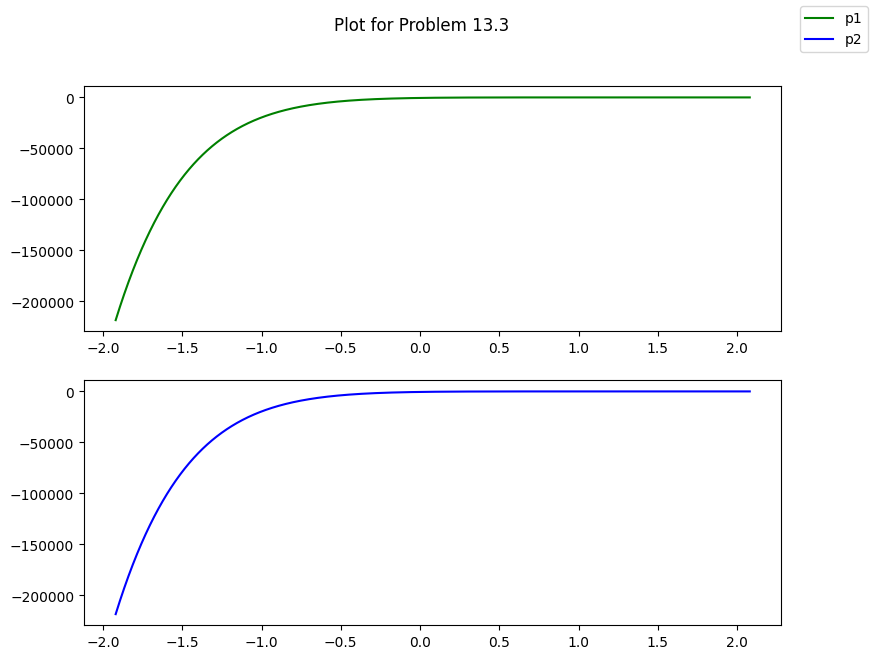

In [78]:
fig, axs = plt.subplots(2, figsize=(9, 7))
axs[0].plot(x, p1(x), color='green', label='p1')
axs[1].plot(x, p2(x), color='blue', label='p2')
fig.suptitle('Plot for Problem 13.3')
fig.legend()


# 13.4 
The polynomial $p(x) = x^5 - 2x^4 - 3x^3 + 3x^2 - 2x - 1$ has three real zeros. Applying Newton's method to $p$ with initial guess $x_0 = 0$ produces a series of estimates $x_1, x_2, x_3, \dots$ that converge rapidly to a zero $x_* \approx -0.315$.

**(a)** Compute $x_1, \dots , x_6$ in floating point arithmetic with $\epsilon_{machine} \approx 10^{-16}$. How many digits do you estimate are correct in each of these numbers?

In [79]:
# Machine epsilon for Numpy's float64 is approximately 10^{-16}
np.finfo(np.float64).eps

In [80]:
def newton(f, dfdx, x0, epsilon=1e-10, max_iters=500):
    # Quick iterative implementation of Newton's method
    iters = 0
    estimates = [x0]
    x_previous = x0
    while np.abs(f(x_previous)) > epsilon and iters < max_iters:
        x_next = x_previous - f(x_previous)/dfdx(x_previous)
        estimates.append(x_next)
        x_previous = x_next
        iters += 1
    return x_next, estimates
        



In [81]:
f = lambda x: (x ** 5) - (2 * x ** 4) - (3 * x ** 3) + 3 * x ** 2 - 2 * x - 1
dfdx = lambda x: (5 * x ** 4) - (8 * x ** 3) - (9 * x ** 2) + (6 * x) - 2
x0 = np.float64(0.0)


In [84]:
x_final, floating_point_xs = newton(f, dfdx, x0)

Below are the sequence of estimates produced by Newton's method. I would estimate that no more than 15 digits after the decimal are correct (but probably fewer due to the division in the algorithm).  

In [85]:
floating_point_xs

**(b)** Compute $x_1, \dots , x_6$ again _exactly_ with the aid of a symbolic algebra system such as Maple or Mathematica. Each $x_j$ is a rational number. How many digits are there in the numerator and the denominator for each $j$?

In [86]:
# Using Sympy
x= symbols('x')
init_printing(use_unicode=True)

In [87]:
f = (x ** 5) - (2 * x ** 4) - (3 * x ** 3) + 3 * x ** 2 - 2 * x - 1
dfdx = diff(f, x)

In [88]:
dfdx

In [96]:
def sym_newton(f, x0, epsilon=1e-10, max_iters=500):
    # symx_previous, symx_next = symbols('symx_previous symxnext dfdx')
    dfdx = diff(f)
    iters = 0
    estimates = [x0]
    fs = list()
    dfdxs = list()
    x_previous = x0
    symx_previous = x
    while np.abs(f.subs(x, x_previous)) > epsilon and iters < max_iters:
        x_next = x_previous - f.subs(x, x_previous)/dfdx.subs(x, x_previous)
        fs.append(f.subs(x, x_previous))
        dfdxs.append(dfdx.subs(x, x_previous))
        estimates.append(x_next)
        x_previous = x_next
        iters += 1
    return x_next, estimates, fs, dfdxs


In [98]:
result, symbolic_xs, fs, dfdxs = sym_newton(f, x0=0.0)


In [99]:
print('Floating point estimates: \n' + str(floating_point_xs))
print('Symbolic estimates \n' + str(symbolic_xs))

Floating point estimates: 
[0.0, -0.5, -0.3368421052631579, -0.31572844839628944, -0.31530116270327685, -0.31530098645936266]
Symbolic estimates 
[0.0, -0.500000000000000, -0.336842105263158, -0.315728448396289, -0.315301162703277, -0.315300986459363]


In [100]:
fs

In [101]:
dfdxs

Taking a look at the values computed for $f$ and $df/dx$ at each step $j$, it appears that there are at least 15 digits after the second iteration.